# Two-Level: Collision of Two 2π Pulses

In [4]:
import numpy as np

SECH_FWHM_CONV = 1./2.6339157938
t_width_1 = 2.0*SECH_FWHM_CONV # [τ]
print('t_width', t_width_1)
# n = 2.0 # For a pulse area of nπ    
# ampl_1 = n/t_width_1/(2*np.pi) # Pulse amplitude [2π Γ]
# print('ampl_1', ampl_1)

t_width_2 = 1.0*SECH_FWHM_CONV # [τ]
# ampl_2 = n/t_width_2/(2*np.pi)
# print('t_width_2', t_width_2)
# print('ampl_2', ampl_2)

t_width 0.7593257175145156


In [5]:
mb_solve_json = """
{
  "atom": {
    "fields": [
      {
        "coupled_levels": [[0, 1]]
      }
    ],
    "num_states": 2
  },
  "t_min": -5.0,
  "t_max": 25.0,
  "t_steps": 240,
  "z_min": -0.5,
  "z_max": 1.5,
  "z_steps": 200,
  "interaction_strengths": [
    10.0
  ],
  "savefile": "mbs-two-sech-2pi-collision"
}
"""

In [6]:
from maxwellbloch import mb_solve
mbs = mb_solve.MBSolve().from_json_str(mb_solve_json)

In [7]:
from maxwellbloch import t_funcs

probe_field = mbs.atom.fields[0]
two_pulse_t_func = lambda t, args: (t_funcs.sech(1)(t, args) +
                                    t_funcs.sech(2)(t, args))
probe_field.rabi_freq_t_func = two_pulse_t_func
probe_field.rabi_freq_t_args = {"n_pi_2": 2.0, "centre_2": 5.0,
 "width_2": t_width_2, "n_pi_1": 2.0, "centre_1": 0.0,
 "width_1": t_width_1}

mbs.atom.build_H_Omega() # We have to rebuild H_Omega
mbs.init_Omegas_zt();

We'll just check that the pulse area is what we want. Should be 4π

In [8]:
print('The input pulse area is {0:.4f}π'.format(
    np.trapz(mbs.Omegas_zt[0,0,:].real, mbs.tlist)/np.pi))

The input pulse area is 3.9982π


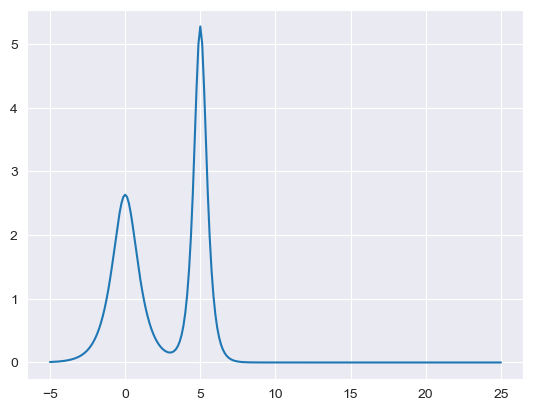

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

plt.plot(mbs.tlist, np.abs(mbs.Omegas_zt[0,0,:]));

## Solve the Problem

In [7]:
Omegas_zt, states_zt = mbs.mbsolve(recalc=False)

10.0%. Run time:   8.51s. Est. time left: 00:00:01:16
20.0%. Run time:  17.76s. Est. time left: 00:00:01:11
30.0%. Run time:  27.07s. Est. time left: 00:00:01:03
40.0%. Run time:  36.51s. Est. time left: 00:00:00:54
50.0%. Run time:  47.45s. Est. time left: 00:00:00:47
60.0%. Run time:  60.16s. Est. time left: 00:00:00:40
70.0%. Run time:  74.58s. Est. time left: 00:00:00:31
80.0%. Run time:  89.54s. Est. time left: 00:00:00:22
90.0%. Run time: 104.13s. Est. time left: 00:00:00:11
Total run time: 118.86s
Saving MBSolve to mbs-two-sech-2pi-collision.qu


## Plot Output

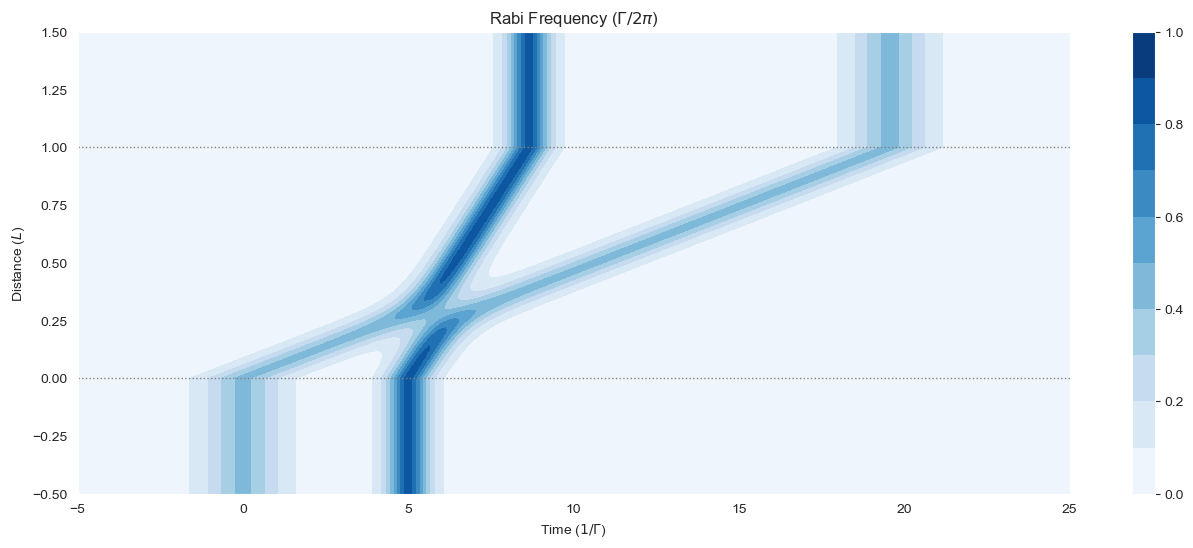

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

sns.set_style('darkgrid')
fig = plt.figure(1, figsize=(16, 6))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0, 11)
cf = ax.contourf(mbs.tlist, mbs.zlist, 
                 np.abs(mbs.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf);

## Pulse area

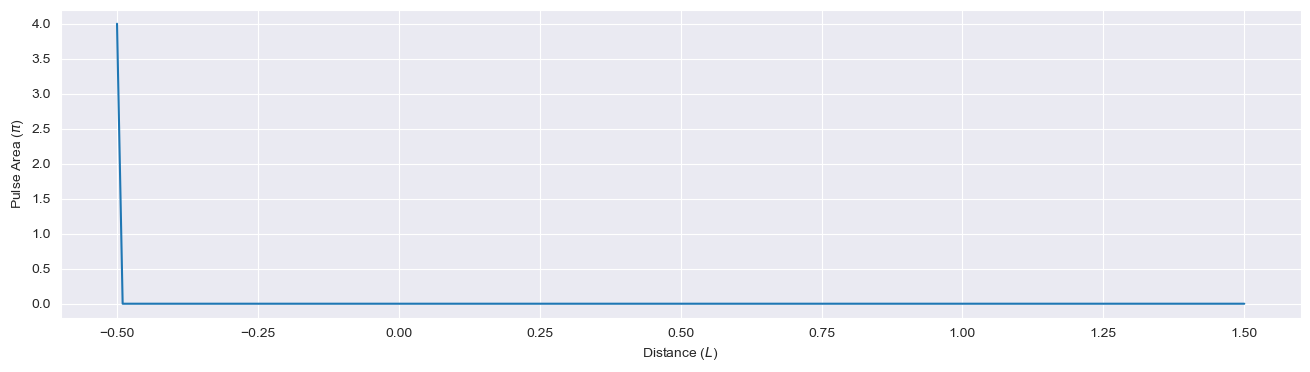

In [10]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(mbs.zlist, mbs.fields_area()[0]/np.pi, clip_on=False)
# ax.set_ylim([0.0, 4.0])
ax.set_xlabel('Distance ($L$)')
ax.set_ylabel('Pulse Area ($\pi$)');

## Movie

In [11]:
C = 0.1 # speed of light
Y_MIN = 0.0 # Y-axis min
Y_MAX = 4.0 # y-axis max
ZOOM = 2 # level of linear interpolation
FPS = 60 # frames per second
ATOMS_ALPHA = 0.2 # Atom indicator transparency

In [12]:
FNAME = "mb-solve-two-sech-2pi-collision"
FNAME_JSON = FNAME + '.json'
with open(FNAME_JSON, "w") as f:
    f.write(mb_solve_json)

In [16]:
!make-mp4-fixed-frame.py -f $FNAME_JSON -c $C --fps $FPS --y-min $Y_MIN --y-max $Y_MAX \
    --zoom $ZOOM --atoms-alpha $ATOMS_ALPHA #--peak-line --c-line

usage: _conda.exe [-h] [-V] command ...
_conda.exe: error: argument command: invalid choice: 'C:\\Users\\A_SAU\\Anaconda3\\envs\\mb\\Scripts\\make-mp4-fixed-frame.py' (choose from 'clean', 'config', 'create', 'help', 'info', 'init', 'install', 'list', 'package', 'remove', 'uninstall', 'run', 'search', 'update', 'upgrade')


In [2]:
FNAME_MP4 = FNAME + '.mp4'
!make-gif-ffmpeg.sh -f $FNAME_MP4 --in-fps $FPS

In [3]:
from IPython.display import Image
Image(url=FNAME_MP4 +'.gif', format='gif')